In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Preprocessing Steps:

### Load the Data:

In [2]:
file_path = 'smoking_driking_dataset_Ver01.csv'
df = pd.read_csv(file_path)

In [3]:
print(f"Before : {df.shape}")

Before : (991346, 24)


In [4]:
df = df.iloc[:-346]
print(f"After : {df.shape}")

After : (991000, 24)


In [5]:
df.to_csv("updated_Dataset_file.csv",index=False)

In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

<Axes: xlabel='age', ylabel='count'>

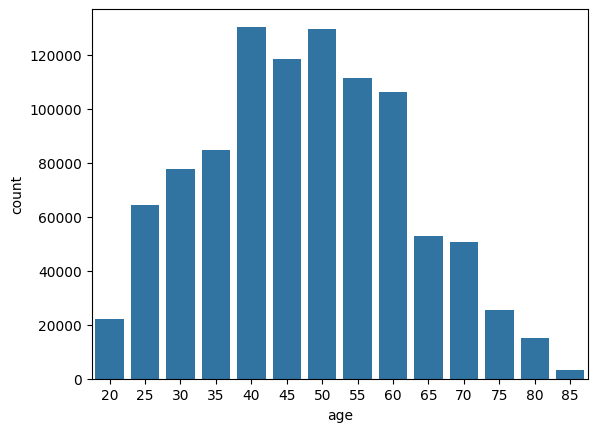

In [7]:
import seaborn as sns
sns.countplot(x="age",data=df)


<Axes: xlabel='age', ylabel='count'>

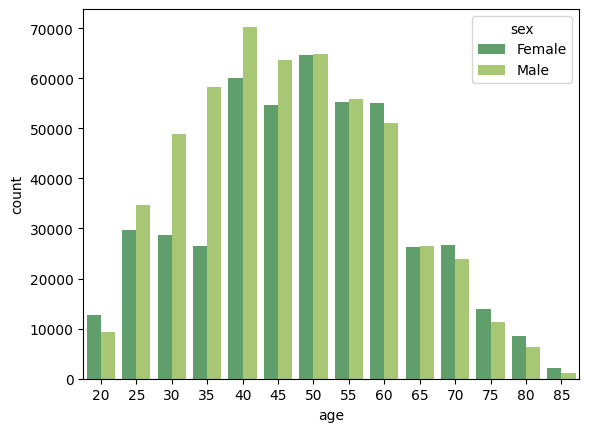

In [8]:
sns.countplot(x="age" , hue="sex",data=df,palette="summer")

<Axes: xlabel='waistline', ylabel='count'>

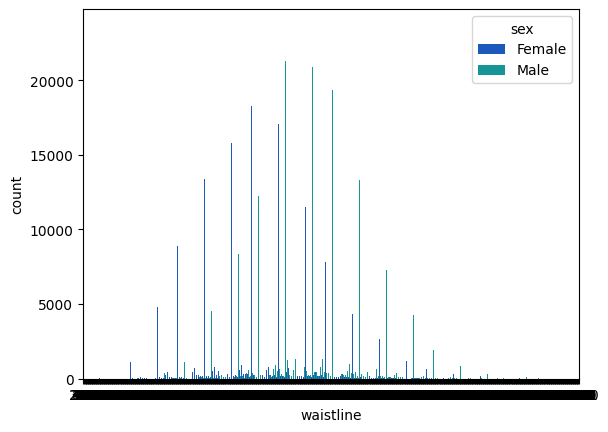

In [9]:
sns.countplot(x="waistline",hue="sex" ,data=df,palette="winter")

<Axes: ylabel='Frequency'>

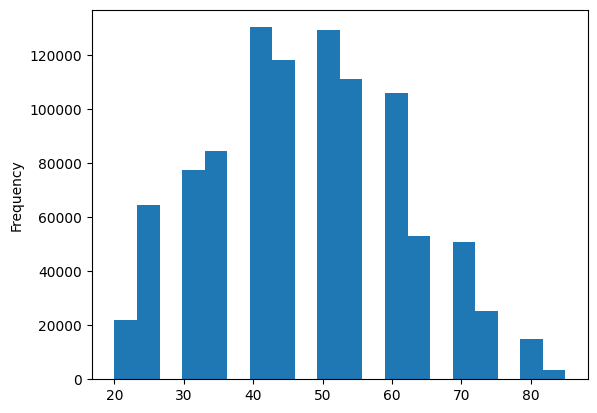

In [10]:
df['age'].plot.hist(bins=20)

<Axes: xlabel='age', ylabel='Count'>

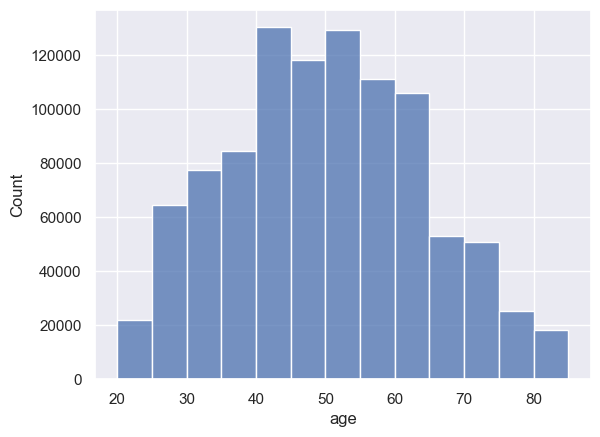

In [11]:
sns.set_theme()
sns.histplot(x="age" ,data=df,binwidth=5) 

<Axes: xlabel='Count', ylabel='age'>

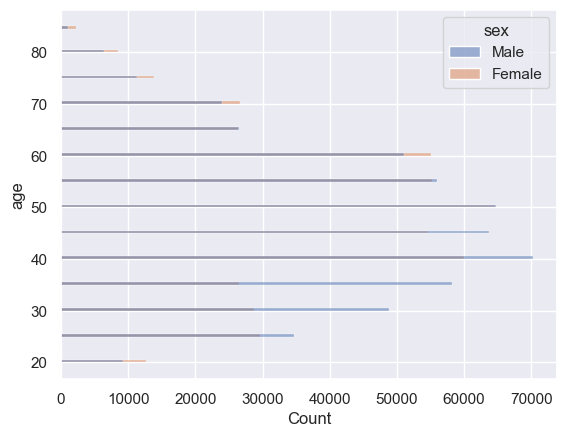

In [12]:
sns.histplot(y="age",hue="sex",data=df)

<Axes: >

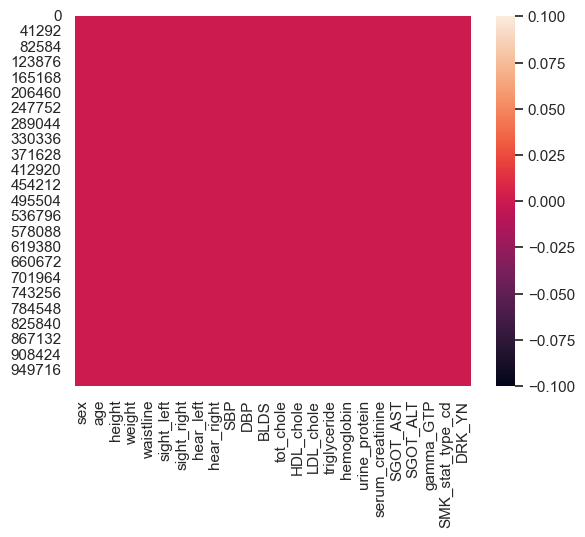

In [13]:
sns.heatmap(data=df.isnull())

### Encode Categorical Variables:

In [14]:

label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
print(f"After Converting : {df.shape}")

After Converting : (991000, 25)


In [15]:
df['DRK_YN_Encoded'] = label_encoder.fit_transform(df['DRK_YN'])
print(df.shape)
df.columns

(991000, 26)


Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN', 'sex_encoded',
       'DRK_YN_Encoded'],
      dtype='object')

In [16]:
df.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_encoded,DRK_YN_Encoded
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,17.1,1,1.0,21,35,40,1,Y,1,1
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,15.8,1,0.9,20,36,27,3,N,1,0
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,15.8,1,0.9,47,32,68,1,N,1,0
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,17.6,1,1.1,29,34,18,1,N,1,0
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,13.8,1,0.8,19,12,25,1,N,1,0


In [17]:
df = df.drop(['sex', 'DRK_YN'], axis=1)
df.columns 
df.shape
df.head(10)

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_encoded,DRK_YN_Encoded
0,35,170,75,90.0,1.0,1.0,1,1,120,80,...,92,17.1,1,1.0,21,35,40,1,1,1
1,30,180,80,89.0,0.9,1.2,1,1,130,82,...,121,15.8,1,0.9,20,36,27,3,1,0
2,40,165,75,91.0,1.2,1.5,1,1,120,70,...,104,15.8,1,0.9,47,32,68,1,1,0
3,50,175,80,91.0,1.5,1.2,1,1,145,87,...,106,17.6,1,1.1,29,34,18,1,1,0
4,50,165,60,80.0,1.0,1.2,1,1,138,82,...,104,13.8,1,0.8,19,12,25,1,1,0
5,50,165,55,75.0,1.2,1.5,1,1,142,92,...,232,13.8,3,0.8,29,40,37,3,1,1
6,45,150,55,69.0,0.5,0.4,1,1,101,58,...,75,12.3,1,0.8,19,12,12,1,0,0
7,35,175,65,84.2,1.2,1.0,1,1,132,80,...,101,14.4,1,0.8,18,18,35,3,1,1
8,55,170,75,84.0,1.2,0.9,1,1,145,85,...,100,15.1,1,0.8,32,23,26,1,1,1
9,40,175,75,82.0,1.5,1.5,1,1,132,105,...,83,13.9,1,0.9,21,38,16,2,1,1


### Split the Data into Features and Target:

In [18]:
X = df.drop(['SMK_stat_type_cd','DRK_YN_Encoded'],axis=1)
y_drinking = df['DRK_YN_Encoded']
y_smoking = df['SMK_stat_type_cd']

In [19]:


print("X:")
print(X.head())


print("\ny_dinking:")
print(y_drinking.head())


print("\ny_smoking:")
print(y_smoking.head())


X:
   age  height  weight  waistline  sight_left  sight_right  hear_left  \
0   35     170      75       90.0         1.0          1.0          1   
1   30     180      80       89.0         0.9          1.2          1   
2   40     165      75       91.0         1.2          1.5          1   
3   50     175      80       91.0         1.5          1.2          1   
4   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  DBP  ...  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0           1  120   80  ...         48        126            92        17.1   
1           1  130   82  ...         55        148           121        15.8   
2           1  120   70  ...         41         74           104        15.8   
3           1  145   87  ...         76        104           106        17.6   
4           1  138   82  ...         61        117           104        13.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  sex_encode

In [20]:
X  
y_drinking  
y_smoking  


0         1
1         3
2         1
3         1
4         1
         ..
990995    3
990996    1
990997    3
990998    1
990999    3
Name: SMK_stat_type_cd, Length: 991000, dtype: int64

### Split the Data into Training and Testing Sets:

In [21]:

X_train, X_test, y_drinking_train, y_drinking_test = train_test_split(
    X, y_drinking, test_size=0.2, random_state=42
)


X_train, X_test, y_smoking_train, y_smoking_test = train_test_split(
    X, y_smoking, test_size=0.2, random_state=42
)

# Training Steps (Logistic Regression Algorithm):

#### Train the Model for Drinking Status Prediction:

In [22]:
model_drinking = LogisticRegression(max_iter=1000)
model_drinking.fit(X_train,y_drinking_train)


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Train the Model for Smoking Level Prediction:

In [23]:
model_smoking = LogisticRegression()
model_smoking.fit(X_train, y_smoking_train)


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Make Predictions:

In [24]:
predictions_drinking = model_drinking.predict(X_test)
predictions_smoking = model_smoking.predict(X_test)

### Evaluate the Model

In [25]:
accuracy_drinking = accuracy_score(y_drinking_test, predictions_drinking)
report_drinking = classification_report(y_drinking_test, predictions_drinking)

accuracy_smoking = accuracy_score(y_smoking_test,predictions_smoking)
report_smoking = classification_report(y_smoking_test, predictions_smoking)


In [26]:
print("Dinking Status Model Using Logistic Regression:")
print(f"Accuracy: {accuracy_drinking}")
print("Classification Report:\n", report_drinking)

Dinking Status Model Using Logistic Regression:
Accuracy: 0.7203582240161454
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72     99381
           1       0.72      0.72      0.72     98819

    accuracy                           0.72    198200
   macro avg       0.72      0.72      0.72    198200
weighted avg       0.72      0.72      0.72    198200



In [27]:
print("\nSmoking Level Model Using Logistic Regression:")
print(f"Accuracy: {accuracy_smoking}")
print("Classification Report:\n", report_smoking)


Smoking Level Model Using Logistic Regression:
Accuracy: 0.6462462159434914
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.91      0.78    120626
           2       0.40      0.09      0.15     35004
           3       0.50      0.36      0.42     42570

    accuracy                           0.65    198200
   macro avg       0.53      0.45      0.45    198200
weighted avg       0.60      0.65      0.59    198200



# Training Steps (Support Vector Machine):

In [28]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_drinking_train, y_drinking_test, y_smoking_train, y_smoking_test = train_test_split(
    X, y_drinking, y_smoking, test_size=0.2, random_state=42
)


### Train the Model for Drinking Status Prediction:

In [29]:


model_drinking_SVM = SVC(kernel='linear', max_iter=1000)
model_drinking_SVM.fit(X_train, y_drinking_train)



c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000)

### Train the Model for Drinking Status Prediction:

In [30]:

model_smoking_SVM = SVC(kernel='linear', max_iter=1000)
model_smoking_SVM.fit(X_train, y_smoking_train)


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000)

### Make Predictions:

In [31]:


predictions_drinking_SVM = model_drinking_SVM.predict(X_test)
predictions_smoking_SVM = model_smoking_SVM.predict(X_test)


### Evaluate the Model

In [32]:
accuracy_drinking_SVM = accuracy_score(y_drinking_test, predictions_drinking_SVM)
report_drinking_SVM = classification_report(y_drinking_test, predictions_drinking_SVM)

accuracy_smoking_SVM = accuracy_score(y_smoking_test, predictions_smoking_SVM)
report_smoking_SVM = classification_report(y_smoking_test, predictions_smoking_SVM)


In [33]:
print("Dinking Status Model Using Support Vector Machine:")
print(f"Accuracy: {accuracy_drinking_SVM}")
print("Classification Report:\n", report_drinking_SVM)


Dinking Status Model Using Support Vector Machine:
Accuracy: 0.4991220988900101
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.01      0.01     99381
           1       0.50      0.99      0.66     98819

    accuracy                           0.50    198200
   macro avg       0.52      0.50      0.34    198200
weighted avg       0.52      0.50      0.34    198200



In [34]:
print("\nSmoking Level Model Using Support Vector Machine:")
print(f"Accuracy: {accuracy_smoking_SVM}")
print("Classification Report:\n", report_smoking_SVM)



Smoking Level Model Using Support Vector Machine:
Accuracy: 0.6104843592330979
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.98      0.76    120626
           2       0.28      0.01      0.01     35004
           3       0.44      0.06      0.10     42570

    accuracy                           0.61    198200
   macro avg       0.45      0.35      0.29    198200
weighted avg       0.52      0.61      0.49    198200

